In [15]:
import pyuvdata
import numpy as np
import sys
sys.path.append("/home/rbyrne/rlb_LWA/beam_manipulation")
import jones_to_mueller
import importlib
importlib.reload(jones_to_mueller)
import matplotlib
import matplotlib.pyplot as plt
import math
import scipy
import scipy.interpolate

In [16]:
beam_path = "/lustre/rbyrne/LWA_10to100_MROsoil_efields.fits"
beam = pyuvdata.UVBeam()
beam.read(beam_path)
beam.select(axis2_inds=np.where(beam.axis2_array <= np.pi/2)[0])
beam.peak_normalize()

In [17]:
# Beam manipulations
beam_radec = jones_to_mueller.pol_basis_transform_azza_to_radec(beam, latitude=37.23, inplace=False)
mueller_coherency = jones_to_mueller.convert_jones_to_mueller(beam_radec)
mueller_stokes = jones_to_mueller.pol_basis_transform_radec_to_stokes(mueller_coherency, inplace=False)
mueller_pstokes = jones_to_mueller.pol_basis_transform_instrumental_to_pseudostokes(mueller_stokes)

In [18]:
unpolarized_beam = mueller_pstokes[0, 0, 0, :, :, :]

In [19]:
az_axis = np.degrees(beam_radec.axis1_array)
za_axis = np.degrees(beam_radec.axis2_array)
za_vals, az_vals = np.meshgrid(za_axis, az_axis)

In [20]:
telescope_lat = 37.23
#obs_hour_angle_rads = 3.31  # Vir A observation
obs_hour_angle_rads = 4.01113  # Calibration observation
ra_vals, dec_vals = jones_to_mueller.coordinate_transfrom_azza_to_radec(
    np.radians(az_vals),
    np.radians(za_vals),
    telescope_lat,
    hour_angle=obs_hour_angle_rads,
)

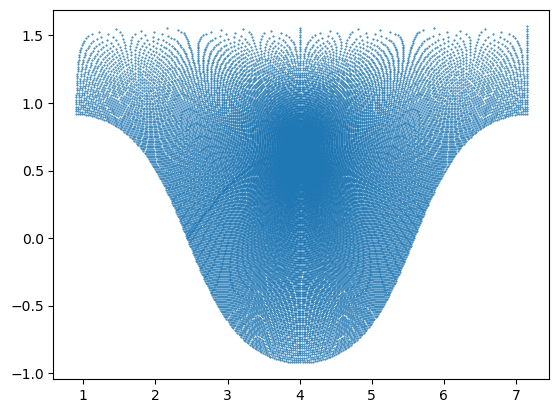

In [21]:
plt.plot(ra_vals.flatten(), dec_vals.flatten(), ".", markersize=1)
plt.show()

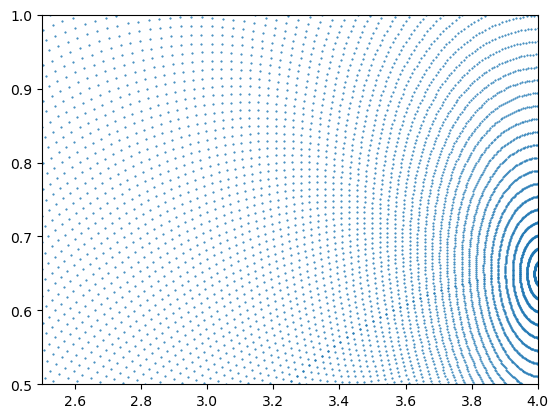

In [22]:
plt.plot(ra_vals.flatten(), dec_vals.flatten(), ".", markersize=1)
plt.xlim([2.5,4])
plt.ylim([.5,1])
plt.show()

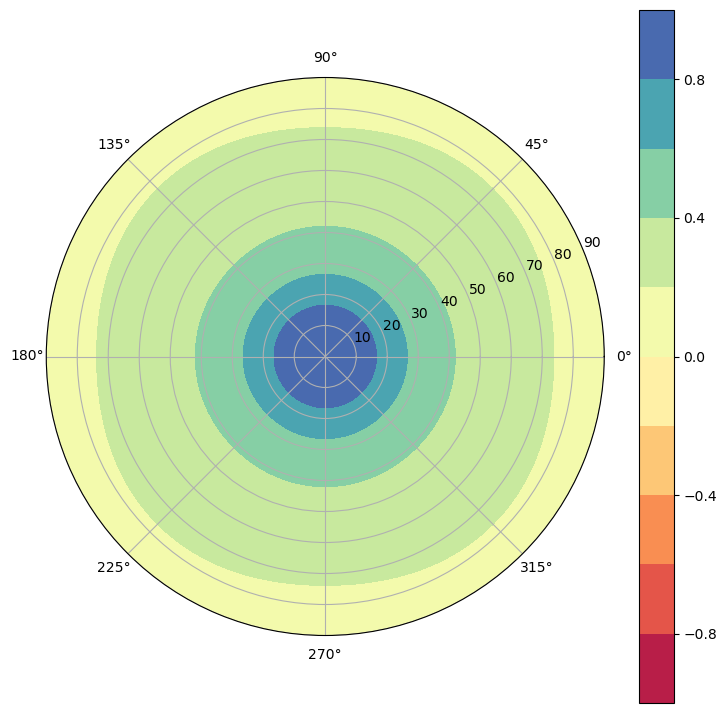

In [23]:
az_axis = np.degrees(beam_radec.axis1_array)
za_axis = np.degrees(beam_radec.axis2_array)
za_vals, az_vals = np.meshgrid(za_axis, az_axis)
fig, ax = plt.subplots(
    nrows=1, ncols=1, subplot_kw=dict(projection="polar"), figsize=(9, 9)
)
freq_ind = np.where(beam.freq_array == 100e6)[0][0]
contourplot = jones_to_mueller.make_polar_contour_plot(
    ax,
    np.real(unpolarized_beam[freq_ind, :, :].T/2),
    np.radians(az_vals),
    za_vals,
)
fig.colorbar(contourplot, ax=ax)
plt.show()

In [24]:
#target_ra = (12+30/60+58/60**2)/12*np.pi  # Vir A
#target_dec = np.radians(12+6/60+19/60**2)  # Vir A
#target_ra = (19 + 56/60 + 4/60**2)/12*np.pi  # Cyg A
#target_dec = np.radians(40 + 48/60 + 4/60**2)  # Cyg A
target_ra = (23 + 17/60 + 40/60**2)/12*np.pi  # Cas A
target_dec = np.radians(59 + 25/60 + 45/60**2)  # Cas A
freq_ind = np.where(beam.freq_array == 50e6)[0][0]
beam_val_interp = scipy.interpolate.griddata((ra_vals.flatten(), dec_vals.flatten()), np.real(unpolarized_beam[freq_ind, :, :].T/2).flatten(), ([target_ra, target_dec]), method="cubic")

In [25]:
print(beam_val_interp)

[0.17759969]


In [26]:
beam_val_interp = np.zeros(beam.Nfreqs)
for freq_ind in range(beam.Nfreqs):
    beam_val_interp[freq_ind] = scipy.interpolate.griddata((ra_vals.flatten(), dec_vals.flatten()), np.real(unpolarized_beam[freq_ind, :, :].T/2).flatten(), ([target_ra, target_dec]), method="cubic")

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)


In [27]:
for freq_ind in range(beam.Nfreqs):
    print(beam_val_interp[freq_ind])

0.19193929482493466
0.18902432673994635
0.1862203828697533
0.18346421080357794
0.18068808863359606
0.17787220337493562
0.17501644325050214
0.172150245026382
0.16935977280005055
0.1667837354316381
0.1645440863340896
0.16277266950988234
0.16152988172282437
0.1608228896875982
0.16060377660698572
0.1607808340614536
0.16124851769086235
0.1619099124574036
0.16268790864312796
0.16352393051054118
0.16437798369562978
0.16530029014890782
0.16612714508275564
0.16692570373188378
0.1676930905104382
0.16842838950034722
0.16913398517733438
0.16981191621594088
0.17046480922627066
0.17109546356802288
0.17170620127874014
0.17230065337302106
0.17288194102924534
0.17345328383959516
0.1740188487014736
0.17457985756712294
0.17514752771638809
0.17572519929072677
0.17632129274007918
0.1769430917166038
0.17759969338459364
0.17829927404244644
0.17905022987899336
0.17985956332339367
0.1807325086322835
0.18167090563120886
0.1826741595447096
0.18373827831673573
0.1848565391052003
0.18602327099739624
0.187227342364

In [28]:
for freq_ind in range(beam.Nfreqs):
    print(beam.freq_array[freq_ind])

10000000.0
11000000.0
12000000.0
13000000.0
14000000.0
15000000.0
16000000.0
17000000.0
18000000.0
19000000.0
20000000.0
21000000.0
22000000.0
23000000.0
24000000.0
25000000.0
26000000.0
27000000.0
28000000.0
29000000.0
30000000.0
31000000.0
32000000.0
33000000.0
34000000.0
35000000.0
36000000.0
37000000.0
38000000.0
39000000.0
40000000.0
41000000.0
42000000.0
43000000.0
44000000.0
45000000.0
46000000.0
47000000.0
48000000.0
49000000.0
50000000.0
51000000.0
52000000.0
53000000.0
54000000.0
55000000.0
56000000.0
57000000.0
58000000.0
59000000.0
60000000.0
61000000.0
62000000.0
63000000.0
64000000.0
65000000.0
66000000.0
67000000.0
68000000.0
69000000.0
70000000.0
71000000.0
72000000.0
73000000.0
74000000.0
75000000.0
76000000.0
77000000.0
78000000.0
79000000.0
80000000.0
81000000.0
82000000.0
83000000.0
84000000.0
85000000.0
86000000.0
87000000.0
88000000.0
89000000.0
90000000.0
91000000.0
92000000.0
93000000.0
94000000.0
95000000.0
96000000.0
97000000.0
98000000.0
99000000.0
100000000.